In [168]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

Storing the datasets into drive and mounting the drive in colab environment

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Savung the 2 datasets into dataframes df and df1 respectively

In [170]:
df = pd.read_csv('/content/drive/MyDrive/Statistics/Dataset/application_data.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Statistics/Dataset/previous_application.csv')

Normally if there are more no of rows we can not see all the rows that are there in the datasets so by using the following commands we can see all the rows and columns that are there in the datasets


In [171]:
pd.set_option('display.max_columns', None)

In [172]:
pd.set_option('display.max_rows', None)

In [173]:
df.head() # to see the top 5 rows from the dataset

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [174]:
df.isnull().sum() # to see the total no of null values present in each column of the dataset

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [175]:
df.shape #check the no of rows and column a dataframe has

(307511, 122)

In [176]:
df.dtypes #this shows us exactly what is the type of data available in the dataframe

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [177]:
c= df.corr() # to understand how all the columns are related to each other we calculate correlation usimg this
c

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000 -0.002108     -0.001129   
TARGET                         -0.002108  1.000000      0.019187   
CNT_CHILDREN                   -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL               -0.001820 -0.003982      0.012882   
AMT_CREDIT                     -0.000343 -0.030369      0.002145   
AMT_ANNUITY                    -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE                -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE      0.000849 -0.037227     -0.025573   
DAYS_BIRTH                     -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                   0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION              -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH                -0.000384  0.051457     -0.028019   
OWN_CAR_AGE                     0.001818  0.037612      0.008494   
FLAG_MOBIL                      0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                 -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE                -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE                0.002815  0.000370     -0.000794   
FLAG_PHONE                      0.002753 -0.023806     -0.029906   
FLAG_EMAIL                      0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS                -0.002895  0.009308      0.879161   
REGION_RATING_CLIENT           -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY    -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START         0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION     -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION      0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION     0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY         -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY         -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY         0.000067  0.032518      0.069957   
EXT_SOURCE_1                    0.000082 -0.155317     -0.138470   
EXT_SOURCE_2                    0.002342 -0.160472     -0.018015   
EXT_SOURCE_3                    0.000222 -0.178919     -0.042710   
APARTMENTS_AVG                  0.001556 -0.029498     -0.013222   
BASEMENTAREA_AVG               -0.002070 -0.022746     -0.008464   
YEARS_BEGINEXPLUATATION_AVG     0.001551 -0.009728      0.006902   
YEARS_BUILD_AVG                 0.005900 -0.022149      0.030172   
COMMONAREA_AVG                 -0.001463 -0.018550      0.000140   
ELEVATORS_AVG                   0.004862 -0.034199     -0.007060   
ENTRANCES_AVG                  -0.002879 -0.019172     -0.008341   
FLOORSMAX_AVG                   0.004851 -0.044003     -0.009705   
FLOORSMIN_AVG                   0.003083 -0.033614     -0.008753   
LANDAREA_AVG                    0.001465 -0.010885     -0.003121   
LIVINGAPARTMENTS_AVG            0.003119 -0.025031     -0.008648   
LIVINGAREA_AVG                  0.001770 -0.032997     -0.010116   
NONLIVINGAPARTMENTS_AVG        -0.002575 -0.003176      0.004051   
NONLIVINGAREA_AVG               0.003042 -0.013578      0.000028   
APARTMENTS_MODE                 0.001961 -0.027284     -0.012105   
BASEMENTAREA_MODE              -0.001411 -0.019952     -0.008513   
YEARS_BEGINEXPLUATATION_MODE    0.001890 -0.009036      0.006199   
YEARS_BUILD_MODE                0.005245 -0.022068      0.029549   
COMMONAREA_MODE                -0.001058 -0.016340      0.000440   
ELEVATORS_MODE                  0.005017 -0.032131     -0.006397   
ENTRANCES_MODE                 -0.002844 -0.017387     -0.006880   
FLOORSMAX_MODE                  0.004386 -0.043226     -0.009550   
FLOORSMIN_MODE                  0.002081 -0.032698     -0.008044   
LANDAREA_MODE                   0.001548 -0.010174     -0.002212   
LIVINGAPARTMENTS_MODE           0.003589 -0.023393     -0.007955   
LIVINGAREA_MODE                 0.002156 -0.030685     -0.009517   
NONLIVINGAPARTMENT

following command shows us in what percentage does each column has null values

In [178]:
df.isnull().sum()/len(df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

here empt stores the columns who have more than 35% of null values

In [179]:
empt=df.isnull().sum()/len(df)*100
empt=empt[empt>35]
empt

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

here we are droppping the the columns who have more than 35% null values

In [180]:
empt=list(empt[empt.values>=35.0].index)
df.drop(labels=empt, axis=1, inplace=True)

In [181]:
df.shape # to see the no of rows and columns after deleting the columns

(307511, 73)

the null here displays the all the other columns who are left after dropping the columns who had more than 35% of null values

In [182]:
null = (df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)
null

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [183]:
len(empt) #it shows the no of columns that have been dropped

49

To check if the data still has any duplicate values is the dataset

In [184]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 73)


To all the columns who we did not droped we are filling the empty space by median and mean of their values

In [185]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)

df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)

df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True)

df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)

df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True)

df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)

df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace = True)

df.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

df.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

df.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

df.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mode() , inplace = True)

df.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True)

df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.median() , inplace = True)

df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.median() , inplace = True)

expect for occupation_type every other column does not contain any null value

In [186]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_4                 0.000000
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_2                 0.000000
DAYS_LAST_PHONE_CHANGE          0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
EXT_SOURCE_3                    0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_11                0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_20                0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_B

Dealing with errors

the date column contains negative values

In [187]:
dates=[i for i in df if i .startswith('DAYS')]
dates

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

using abs function we are turning negative values to positive values for further evaluation

In [188]:
df[dates]=abs(df[dates])
print(df['DAYS_BIRTH'].unique())
print(df['DAYS_EMPLOYED'].unique())
print(df['DAYS_REGISTRATION'].unique())
print(df['DAYS_ID_PUBLISH'].unique())
print(df['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


now in code_gender column we can see there is a null value called XNA so we will replace it with the most occured other value that is F

In [189]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [190]:
df.loc[df.CODE_GENDER=='XNA', 'CODE_GENDER'] ='F' #replacing with F
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [191]:
df.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

same what we have done above can be seen in below columns, for name_income_type Pensionser the organization_type is showing XNA

In [192]:
df[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

In [193]:
df.NAME_INCOME_TYPE.value_counts() #count of all the categories

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

so we are replacing XNA with Pensioner here

In [194]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

here we going to specify the range and based on that range we are goin to give some value to make that data continuous

In [195]:
df['AMT_INCOME_TYPE'] = pd.qcut(df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [196]:
df['AMT_CREDIT_TYPE'] = pd.qcut(df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

same case can be done here, we are going to set a range and based on that the values will be given

In [197]:
df['DAYS_BIRTH']= (df['DAYS_BIRTH']/365).astype(int)
df['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [198]:
df['AGE_GROUP']=pd.cut(df['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
df[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

some columns have datatype as object so to avoid any issues during modeling are goin to change tha datatype of those columns to category

In [199]:
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].astype('category')
df['CODE_GENDER'] = df['CODE_GENDER'].astype('category')
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].astype('category')
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].astype('category')
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].astype('category')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].astype('category')
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].astype('category')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].astype('category')
df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].astype('category')
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].astype('category')

In [200]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


the following cell contains more columns which are not helping in eda or modeling so we are going to remove them as well

In [201]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

checking the no if colmuns we are left with after removing the unwanted columns

In [202]:
numerical_col = df.select_dtypes(include='number').columns
len(numerical_col)

33

we are going to plot a boxplot of all the numerical values to find outliers in the dataset

<Figure size 4000x8000 with 0 Axes>

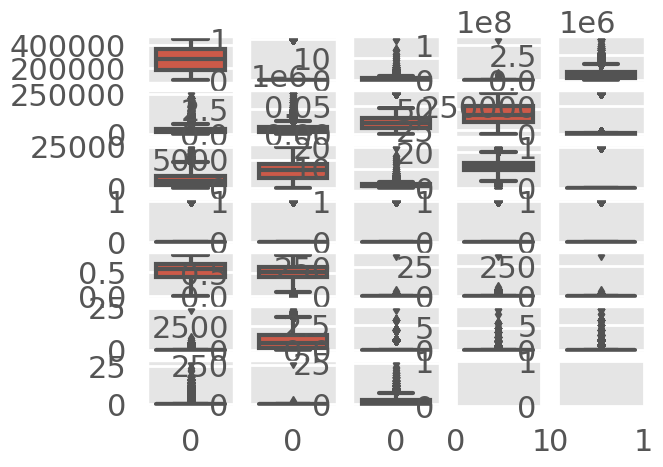

In [203]:
plt.figure(figsize=(40,80))  # figure size
fig, axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=10, hspace=15)
for ax, column in zip(axes.flatten(),numerical_col):
    sns.boxplot(df[column],ax=ax)

to check if the datset is imbalanced or jot we are going to split the datset into 2 df based the column named TARGET

In [204]:
Target0 = df.loc[df["TARGET"]==0]
Target1 = df.loc[df["TARGET"]==1]

In [205]:
round(len(Target0)/len(Target1),2)

11.39

there is an imbalance of around 11.39 in our dataset. the visualization of the same is done by pie chart

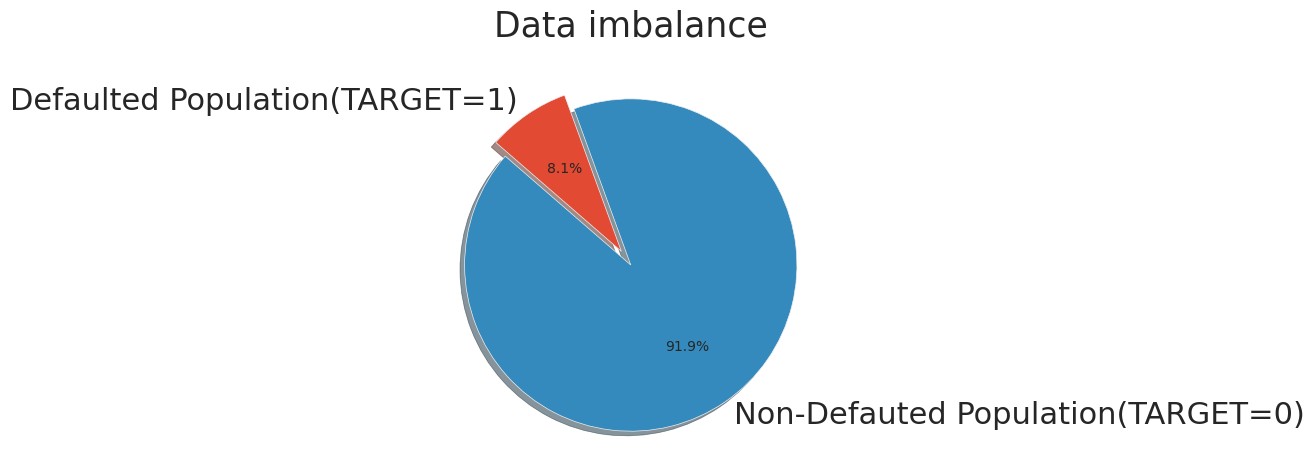

In [206]:
count1 = 0
count0 = 0
for i in df['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df['TARGET']))*100
count0 = (count0/len(df['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')
plt.title('Data imbalance',fontsize=25)
plt.show()

here the countplot shows the distribution from TARGET 0 and TARGET1 based on the gender who applied for the loan

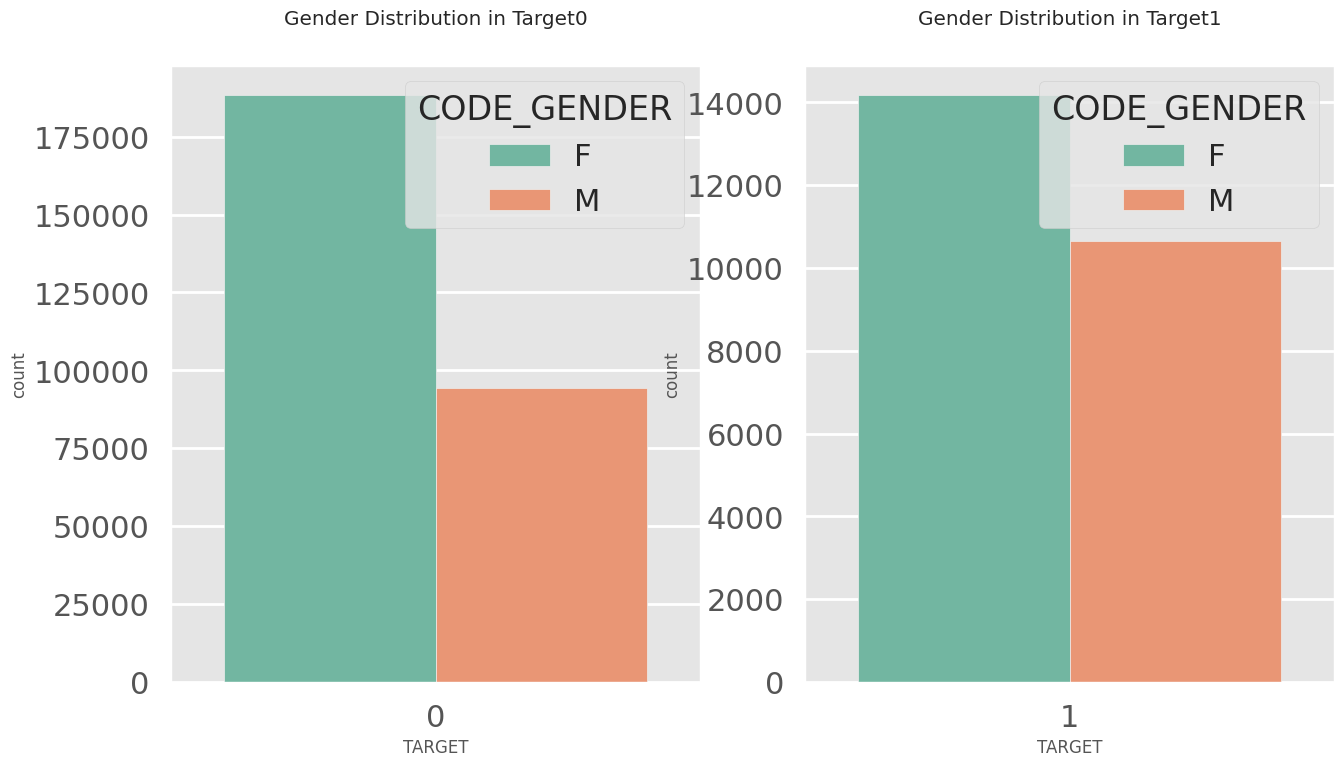

In [207]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")
plt.show()

below shows the age group based distribution of loan application

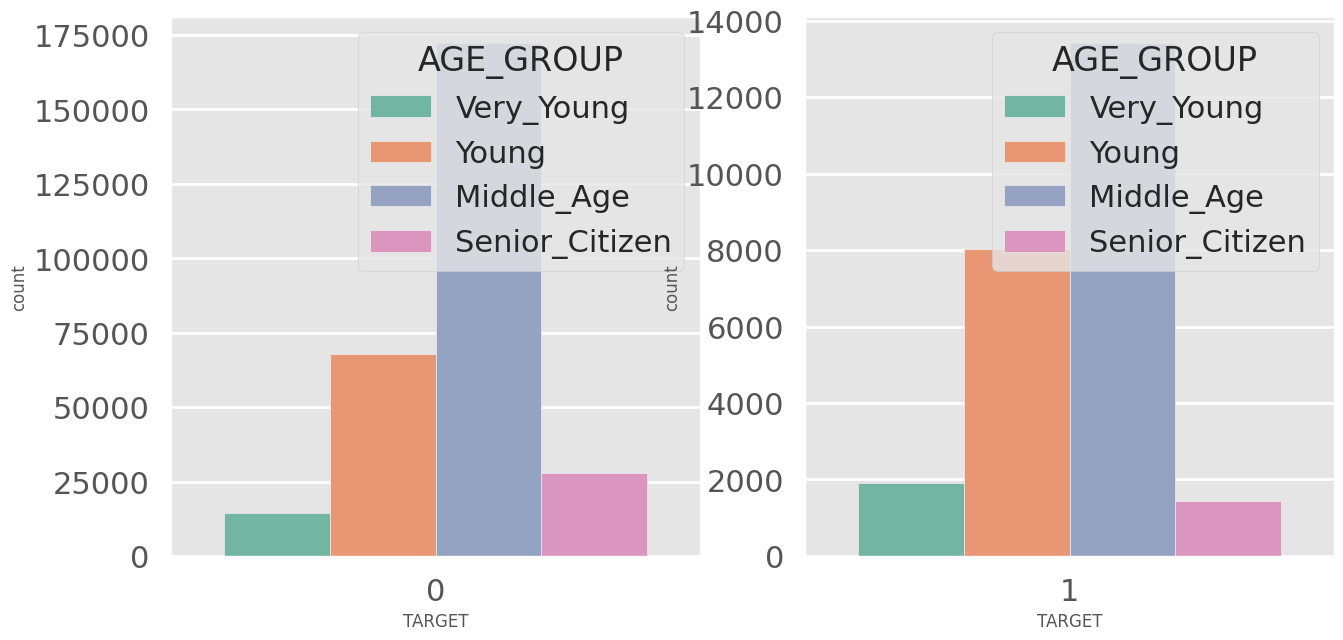

In [208]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

below graph shows the clients count in order of from highest to lowest no of load application

<Figure size 4000x500 with 0 Axes>

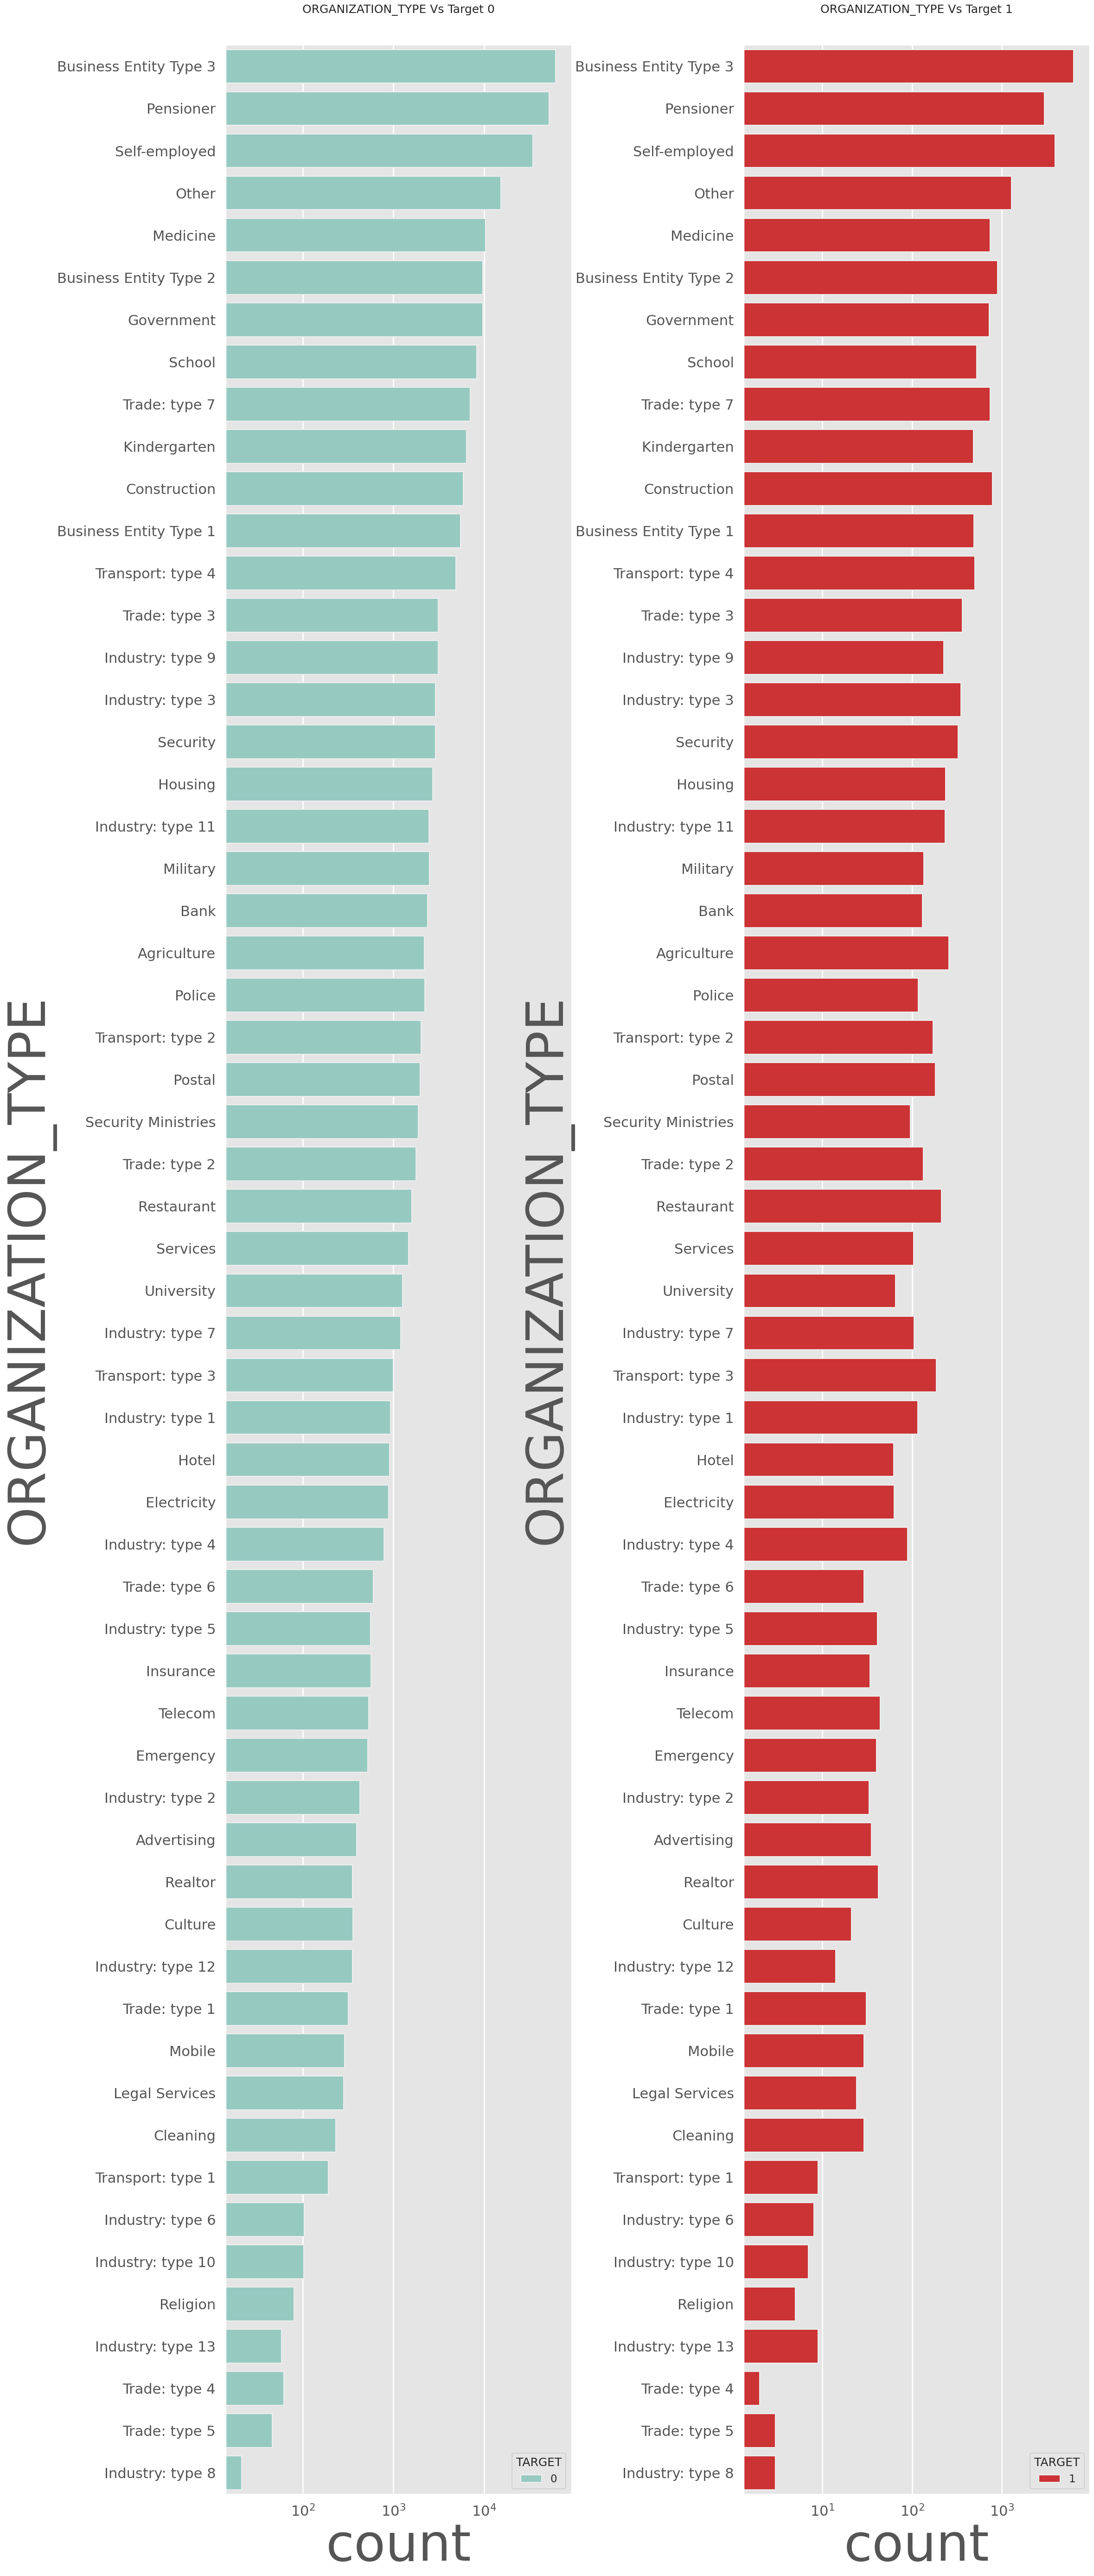

In [209]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3)

plt.subplot(121)
plt.xscale('log')                                                                             # For Target0
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',order=df['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")

plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',order=df['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")

plt.show();

Cleaning and Analysing the 2nd datset

In [210]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [211]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [212]:
df1.shape

(1670214, 37)

In [213]:
c1= df1.corr()
c1

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.000321     0.011459   
SK_ID_CURR                  -0.000321    1.000000     0.000577   
AMT_ANNUITY                  0.011459    0.000577     1.000000   
AMT_APPLICATION              0.003302    0.000280     0.808872   
AMT_CREDIT                   0.003659    0.000195     0.816429   
AMT_DOWN_PAYMENT            -0.001313   -0.000063     0.267694   
AMT_GOODS_PRICE              0.015293    0.000369     0.820895   
HOUR_APPR_PROCESS_START     -0.002652    0.002842    -0.036201   
NFLAG_LAST_APPL_IN_DAY      -0.002828    0.000098     0.020639   
RATE_DOWN_PAYMENT           -0.004051    0.001158    -0.103878   
RATE_INTEREST_PRIMARY        0.012969    0.033197     0.141823   
RATE_INTEREST_PRIVILEGED    -0.022312   -0.016757    -0.202335   
DAYS_DECISION                0.019100   -0.000637     0.279051   
SELLERPLACE_AREA            -0.001079    0.001265    -0.015027   
CNT_PAYMENT                  0.015589    0.000031     0.394535   
DAYS_FIRST_DRAWING          -0.001478   -0.001329     0.052839   
DAYS_FIRST_DUE              -0.000071   -0.000757    -0.053295   
DAYS_LAST_DUE_1ST_VERSION    0.001222    0.000252    -0.068877   
DAYS_LAST_DUE                0.001915   -0.000318     0.082659   
DAYS_TERMINATION             0.001781   -0.000020     0.068022   
NFLAG_INSURED_ON_APPROVAL    0.003986    0.000876     0.283080   

                           AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  \
SK_ID_PREV                        0.003302    0.003659         -0.001313   
SK_ID_CURR                        0.000280    0.000195         -0.000063   
AMT_ANNUITY                       0.808872    0.816429          0.267694   
AMT_APPLICATION                   1.000000    0.975824          0.482776   
AMT_CREDIT                        0.975824    1.000000          0.301284   
AMT_DOWN_PAYMENT                  0.482776    0.301284          1.000000   
AMT_GOODS_PRICE                   0.999884    0.993087          0.482776   
HOUR_APPR_PROCESS_START          -0.014415   -0.021039          0.016776   
NFLAG_LAST_APPL_IN_DAY            0.004310   -0.025179          0.001597   
RATE_DOWN_PAYMENT                -0.072479   -0.188128          0.473935   
RATE_INTEREST_PRIMARY             0.110001    0.125106          0.016323   
RATE_INTEREST_PRIVILEGED         -0.199733   -0.205158         -0.115343   
DAYS_DECISION                     0.133660    0.133763         -0.024536   
SELLERPLACE_AREA                 -0.007649   -0.009567          0.003533   
CNT_PAYMENT                       0.680630    0.674278          0.031659   
DAYS_FIRST_DRAWING                0.074544   -0.036813         -0.001773   
DAYS_FIRST_DUE                   -0.049532    0.002881         -0.013586   
DAYS_LAST_DUE_1ST_VERSION        -0.084905    0.044031         -0.000869   
DAYS_LAST_DUE                     0.172627    0.224829         -0.031425   
DAYS_TERMINATION                  0.148618    0.214320         -0.030702   
NFLAG_INSURED_ON_APPROVAL         0.259219    0.263932         -0.042585   

                           AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_PREV                        0.015293                -0.002652   
SK_ID_CURR                        0.000369                 0.002842   
AMT_ANNUITY                       0.820895                -0.036201   
AMT_APPLICATION                   0.999884                -0.014415   
AMT_CREDIT                        0.993087                -0.021039   
AMT_DOWN_PAYMENT                  0.482776                 0.016776   
AMT_GOODS_PRICE                   1.000000                -0.045267   
HOUR_APPR_PROCESS_START          -0.045267                 1.000000   
NFLAG_LAST_APPL_IN_DAY           -0.017100                 0.005789   
RATE_DOWN_PAYMENT                -0.072479                 0.025930   
RATE_INTEREST_PRIMARY             0.110001                -0.027172   
RATE_INTEREST_PRIVILEGED         -0.199733       

In [214]:
df1.isnull().sum()/len(df1)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [215]:
empt1=df1.isnull().sum()/len(df1)*100
empt1=empt1[empt1>35]
empt1

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [216]:
empt1=list(empt1[empt1.values>=35.0].index)
df1.drop(labels=empt1, axis=1, inplace=True)

In [217]:
df1.shape

(1670214, 26)

In [218]:
null1 = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
null1

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [219]:
len(empt1)

11

In [220]:
df1.AMT_GOODS_PRICE.fillna(df1.AMT_GOODS_PRICE.median(),inplace = True)

df1.AMT_ANNUITY.fillna(df1.AMT_ANNUITY.mode()[0],inplace = True)

df1.CNT_PAYMENT.fillna(df1.CNT_PAYMENT.mode()[0],inplace = True)

In [221]:
(df1.isnull().sum()/len(df1)*100)

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


following is for the columns who contain null values XNA we will be removing those also

In [222]:
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 26)

Now we will merge both the cleaned datasets

In [223]:
df2=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [224]:
df2.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0       100034       0     Revolving loans           M            N   
1       100035       0          Cash loans           F            N   
2       100039       0          Cash loans           M            Y   
3       100046       0     Revolving loans           M            Y   
4       100046       0     Revolving loans           M            Y   
5       100053       0          Cash loans           F            N   
6       100060       0          Cash loans           M            Y   
7       100063       0          Cash loans           F            N   
8       100063       0          Cash loans           F            N   
9       100063       0          Cash loans           F            N   
10      100077       0          Cash loans           M            N   
11      100079       0     Revolving loans           M            N   
12      100080       0     Revolving loans           F            N   
13      100084       0          Cash loans           M            N   
14      100085       0          Cash loans           M            N   
15      100089       0          Cash loans           M            N   
16      100098       0     Revolving loans           M            Y   
17      100099       0          Cash loans           F            N   
18      100100       0          Cash loans           M            Y   
19      100105       0          Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0                Y             0           90000.0     180000.0        9000.0   
1                Y             0          292500.0     665892.0       24592.5   
2                N             1          360000.0     733315.5       39069.0   
3                Y             0          180000.0     540000.0       27000.0   
4                Y             0          180000.0     540000.0       27000.0   
5                Y             0          202500.0     305221.5       17649.0   
6                N             0           76500.0     454500.0       14661.0   
7                Y             0          180000.0     837427.5       45558.0   
8                Y             0          180000.0     837427.5       45558.0   
9                Y             0          180000.0     837427.5       45558.0   
10               Y             0          180000.0    1256400.0       40657.5   
11               Y             0          225000.0     270000.0       13500.0   
12               N             1          157500.0     450000.0       22500.0   
13               Y             2          225000.0     495351.0       26140.5   
14               Y             1          157500.0     755190.0       28894.5   
15               Y             0          135000.0     337761.0       15781.5   
16               N             0          225000.0     270000.0       13500.0   
17               Y             0          360000.0     733315.5       41076.0   
18               Y             2          202500.0     796396.5       38443.5   
19               Y             0          193500.0     225000.0       23755.5   

    AMT_GOODS_PRICE_ NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           180000.0   Unaccompanied               Working   
1           477000.0   Unaccompanied  Commercial associate   
2           679500.0   Unaccompanied  Commercial associate   
3           540000.0   Unaccompanied               Working   
4           540000.0   Unaccompanied               Working   
5           252000.0          Family             Pensioner   
6           454500.0   Unaccompanied               Working   
7           666000.0   Unaccompanied               Working   
8           666000.0   Unaccompanied               Working   
9           666000.0   Unaccompanied               Working   
10          900000.0   Unaccompanied  Commercial associate   
11          270000.0   Unaccompanied               Working   
12  

In [225]:
df2.shape

(59413, 73)

In [226]:
df2.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_             0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_                     0
AMT_ANNUITY_                    7
AMT_GOODS_PRICE_               59
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
WEEKDAY_APPR_PROCESS_START_     0
HOUR_APPR_PROCESS_START_        0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_W

In [227]:
(df2.isnull().sum()/len(df1)*100)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE_            0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT_                    0.000000
AMT_ANNUITY_                   0.010052
AMT_GOODS_PRICE_               0.084728
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000000
WEEKDAY_APPR_PROCESS_START_    0.000000
HOUR_APPR_PROCESS_START_       0.000000


here we will remove the columns which have null values  

In [228]:
df2. AMT_GOODS_PRICE_.fillna(df2.EXT_SOURCE_2.median() , inplace = True)

df2.AMT_ANNUITY_.fillna(df2.EXT_SOURCE_3.median() , inplace = True)

In [229]:
(df2.isnull().sum()/len(df1)*100)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE_            0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT_                    0.0
AMT_ANNUITY_                   0.0
AMT_GOODS_PRICE_               0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
WEEKDAY_APPR_PROCESS_START_    0.0
HOUR_APPR_PROCESS_START_       0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CI

In [230]:
df2.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_            category
CODE_GENDER                    category
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_                     float64
AMT_ANNUITY_                    float64
AMT_GOODS_PRICE_                float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                 float64
WEEKDAY_APPR_PROCESS_START_    category
HOUR_APPR_PROCESS_START_          int64


In [231]:
c2= df2.corr() #here we are finding the correlation
c2

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.004885     -0.004174   
TARGET                        -0.004885  1.000000      0.026986   
CNT_CHILDREN                  -0.004174  0.026986      1.000000   
AMT_INCOME_TOTAL               0.005735 -0.026427      0.009053   
AMT_CREDIT_                    0.008889 -0.027218     -0.016196   
AMT_ANNUITY_                   0.007521 -0.003872      0.015859   
AMT_GOODS_PRICE_               0.010486 -0.035966     -0.019892   
REGION_POPULATION_RELATIVE     0.003640 -0.057820     -0.017921   
DAYS_BIRTH                     0.011489 -0.062271     -0.353845   
DAYS_EMPLOYED                  0.004150 -0.046332     -0.203497   
DAYS_REGISTRATION              0.011031 -0.051176     -0.184627   
DAYS_ID_PUBLISH                0.003399 -0.053579      0.027380   
CNT_FAM_MEMBERS                0.000265  0.025199      0.881914   
HOUR_APPR_PROCESS_START_       0.008999 -0.035085     -0.016142   
REG_REGION_NOT_LIVE_REGION    -0.002157 -0.004221     -0.004413   
REG_REGION_NOT_WORK_REGION     0.013430  0.005917      0.009472   
LIVE_REGION_NOT_WORK_REGION    0.017787  0.006229      0.017863   
REG_CITY_NOT_LIVE_CITY        -0.013604  0.039054      0.029562   
REG_CITY_NOT_WORK_CITY        -0.005380  0.055660      0.070760   
LIVE_CITY_NOT_WORK_CITY        0.002041  0.041623      0.066061   
EXT_SOURCE_2                   0.015678 -0.177701     -0.024647   
EXT_SOURCE_3                   0.012486 -0.188994     -0.051442   
OBS_30_CNT_SOCIAL_CIRCLE       0.000699  0.026563      0.024998   
DEF_30_CNT_SOCIAL_CIRCLE       0.004991  0.024675     -0.003010   
OBS_60_CNT_SOCIAL_CIRCLE       0.000955  0.026209      0.023704   
DEF_60_CNT_SOCIAL_CIRCLE      -0.001092  0.021117     -0.002376   
DAYS_LAST_PHONE_CHANGE         0.012696 -0.068257     -0.014632   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.004380  0.000175     -0.003503   
AMT_REQ_CREDIT_BUREAU_DAY      0.010942  0.004066     -0.009965   
AMT_REQ_CREDIT_BUREAU_WEEK    -0.000118 -0.003909      0.010412   
AMT_REQ_CREDIT_BUREAU_MON      0.007614 -0.026527     -0.021309   
AMT_REQ_CREDIT_BUREAU_QRT     -0.018919  0.005153     -0.013531   
AMT_REQ_CREDIT_BUREAU_YEAR     0.006848 -0.017608     -0.022683   
SK_ID_PREV                     0.001796 -0.004207      0.001173   
AMT_ANNUITYx                   0.003357 -0.040093      0.032301   
AMT_APPLICATION                0.008681 -0.031367      0.033574   
AMT_CREDITx                    0.008775 -0.025996      0.037756   
AMT_GOODS_PRICEx               0.008681 -0.031367      0.033574   
HOUR_APPR_PROCESS_STARTx       0.007507 -0.032340     -0.010109   
NFLAG_LAST_APPL_IN_DAY        -0.004461 -0.000161      0.002177   
DAYS_DECISION                 -0.005133  0.062798      0.062669   
SELLERPLACE_AREA              -0.001288  0.020981      0.007215   
CNT_PAYMENT                    0.007155  0.030572      0.033888   

                             AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
SK_ID_CURR                           0.005735     0.008889      0.007521   
TARGET                              -0.026427    -0.027218     -0.003872   
CNT_CHILDREN                         0.009053    -0.016196      0.015859   
AMT_INCOME_TOTAL                     1.000000     0.363042      0.443846   
AMT_CREDIT_                          0.363042     1.000000      0.746641   
AMT_ANNUITY_                         0.443846     0.746641      1.000000   
AMT_GOODS_PRICE_                     0.366957     0.985286      0.748382   
REGION_POPULATION_RELATIVE           0.189405     0.112257      0.125730   
DAYS_BIRTH                          -0.011503     0.085172     -0.001530   
DAYS_EMPLOYED                       -0.107984    -0.021177     -0.076050   
DAYS_REGISTRATION                   -0.037644     0.005146     -0.040107   
DAYS_ID_PUBLISH                     -0.008055    -0.004583     -0.025835   
CNT_FAM_MEMBERS                      0.008538     0.028816      0.061685   
HOUR_APPR_PROCES

In [232]:
duplicate_rows_df = df2[df2.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 73)


we are renaming the columns in the cell below

In [233]:
df2 = df2.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY','WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV','AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

in the below pie we can understand that the % of clients repetations, new clients and the % of clients got their loan approved or those who didnt

In [234]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of NAME_CLIENT_TYPE","Percentage of NAME_CONTRACT_STATUS"),specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = df2['NAME_CLIENT_TYPE'].value_counts().index.to_list(),values = df2['NAME_CLIENT_TYPE'].value_counts().to_list() ,textinfo='label+percent'),1, 1)

fig.add_trace(go.Pie(labels = df2['NAME_CONTRACT_STATUS'].value_counts().index.to_list(), values = df2['NAME_CONTRACT_STATUS'].value_counts().to_list(), textinfo='label+percent'),1, 2)

fig.update_traces(hole=.4,showlegend=False)

fig.show()

the % of loan clients purpose for loan can be seen form the visualization below it contain the % of rejection reason also

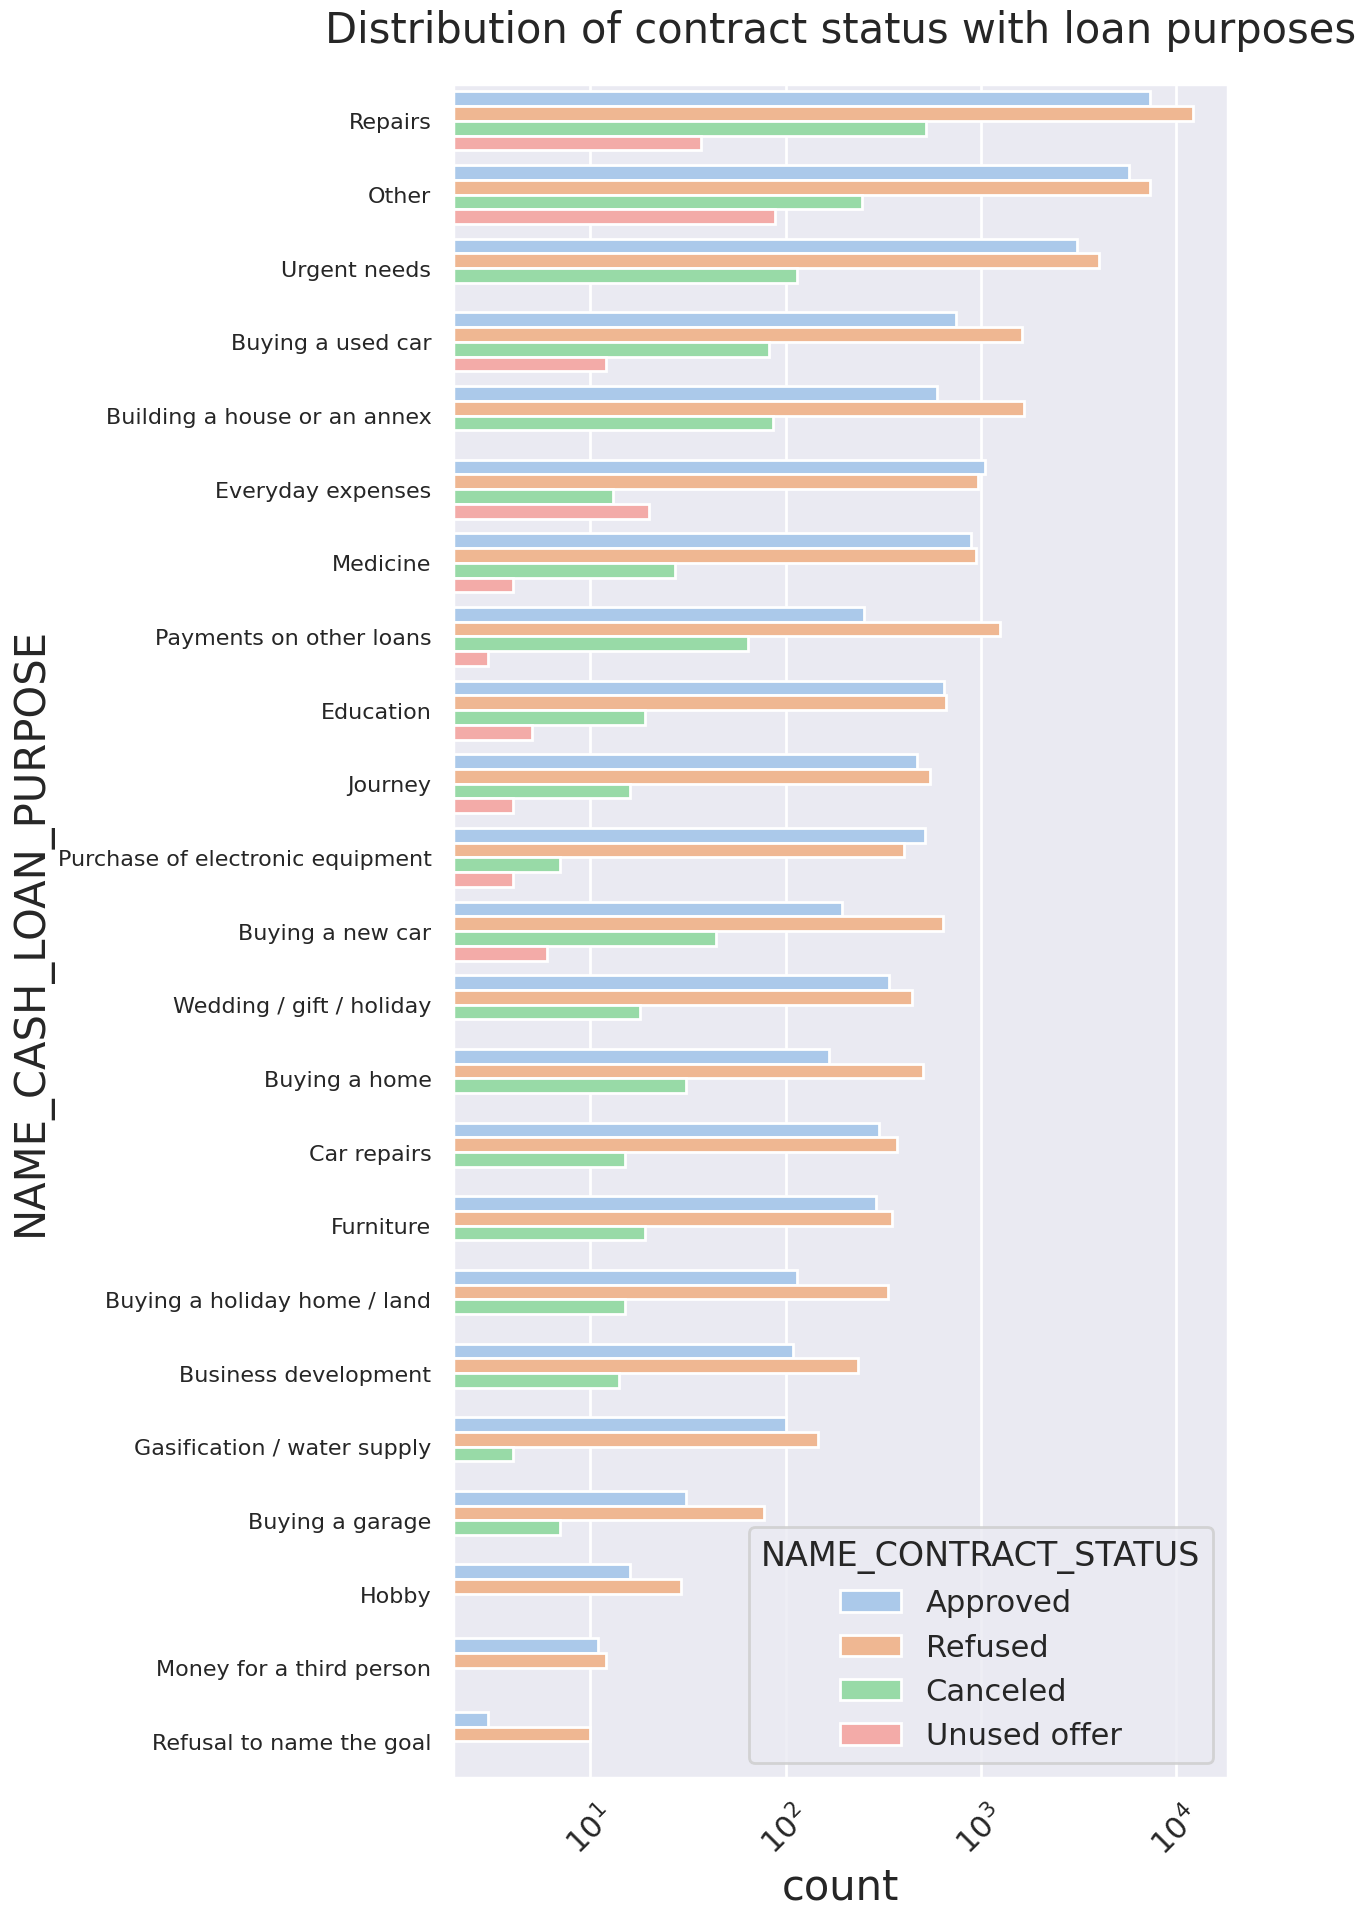

In [235]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')

ax = sns.countplot(data = df2, y= 'NAME_CASH_LOAN_PURPOSE', order=df2['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

From the below plotting, we can see that distribution of the TARGET column with various purpose of issuing the loan

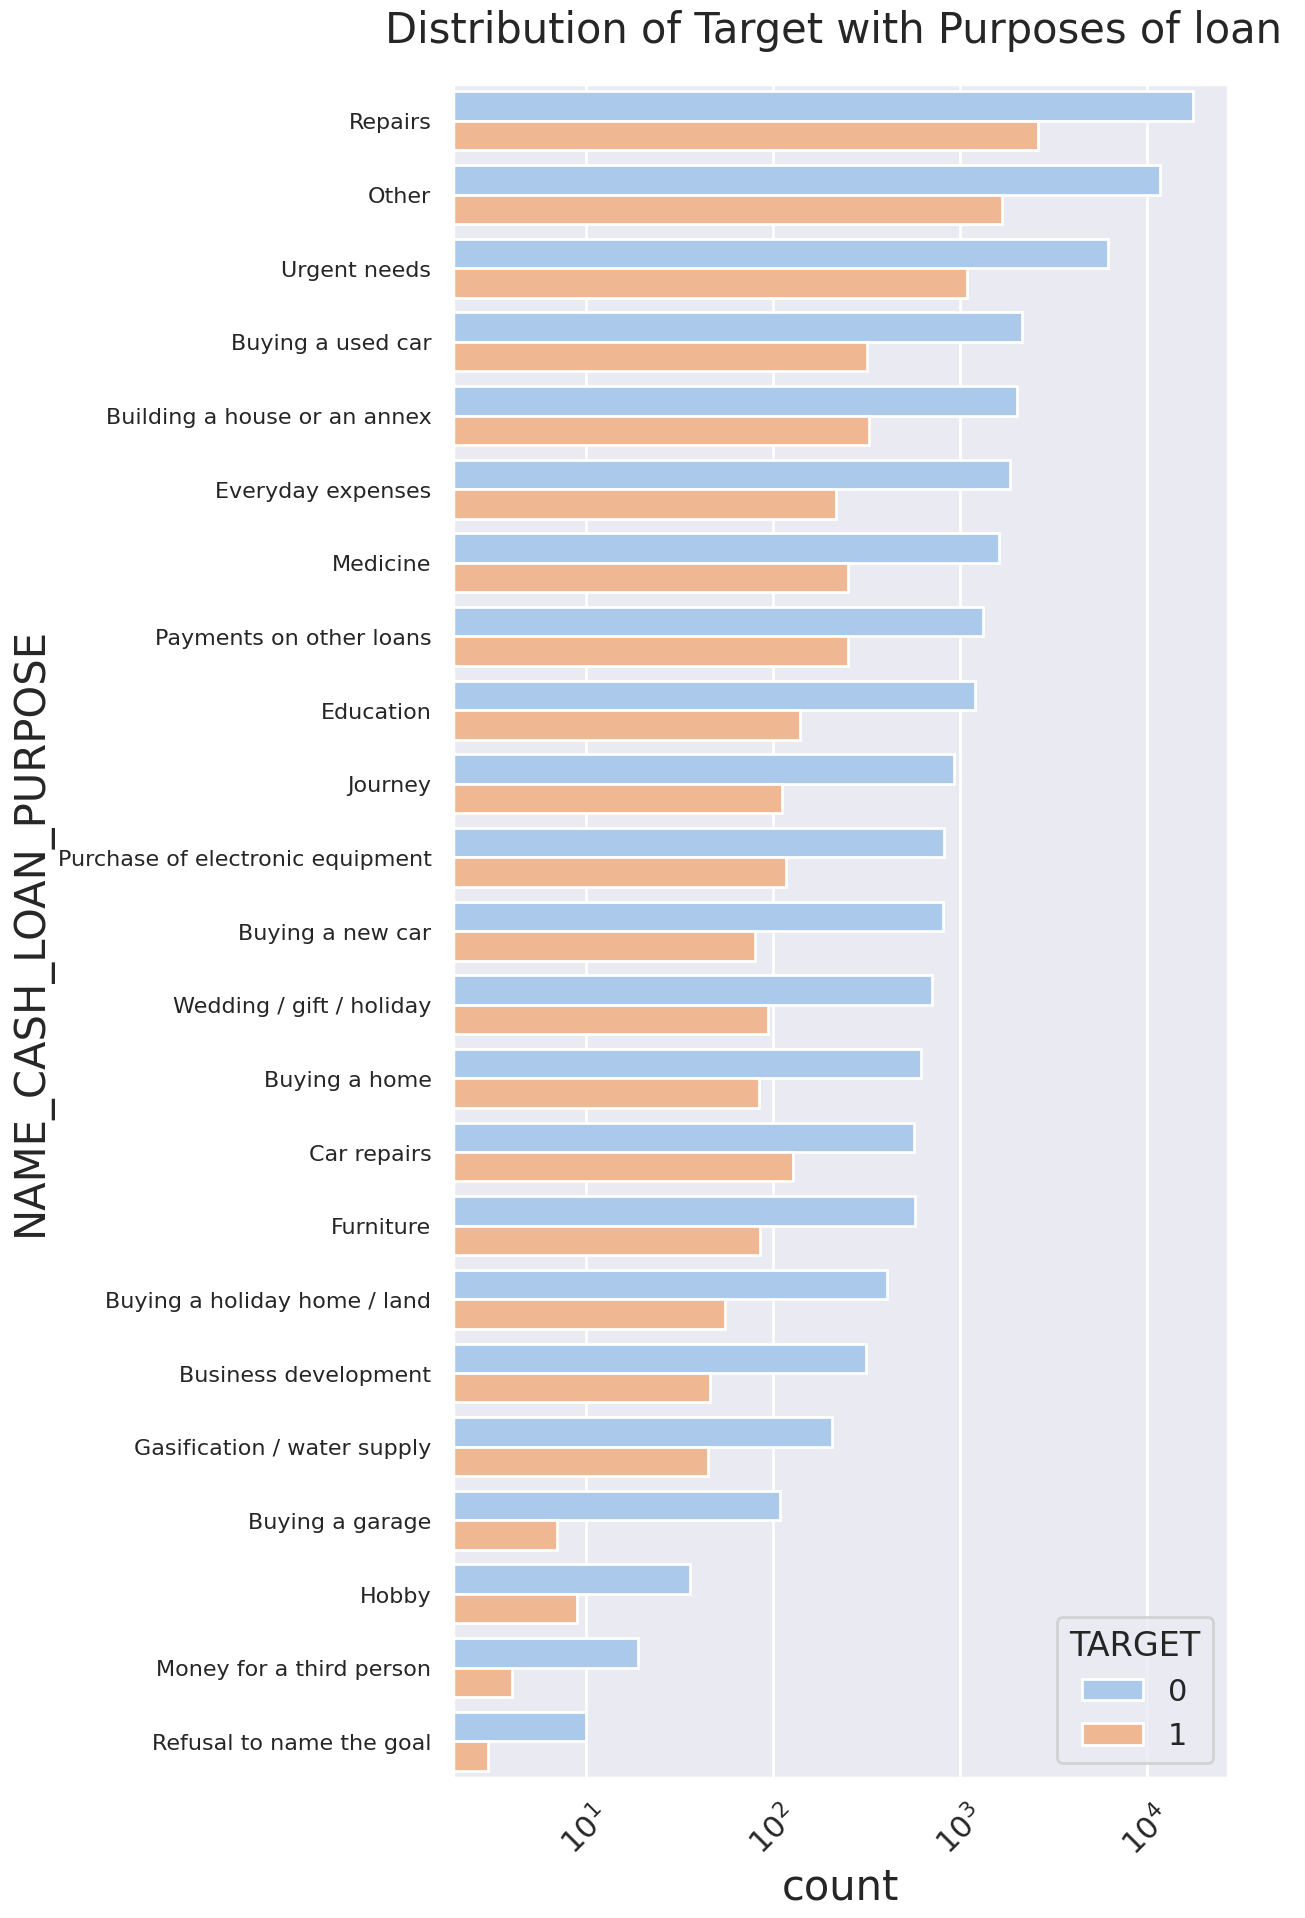

In [236]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of Target with Purposes of loan ')

ax = sns.countplot(data = df2, y= 'NAME_CASH_LOAN_PURPOSE', order=df2['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='pastel')

*Displaying* the heatmap of our second dataframe

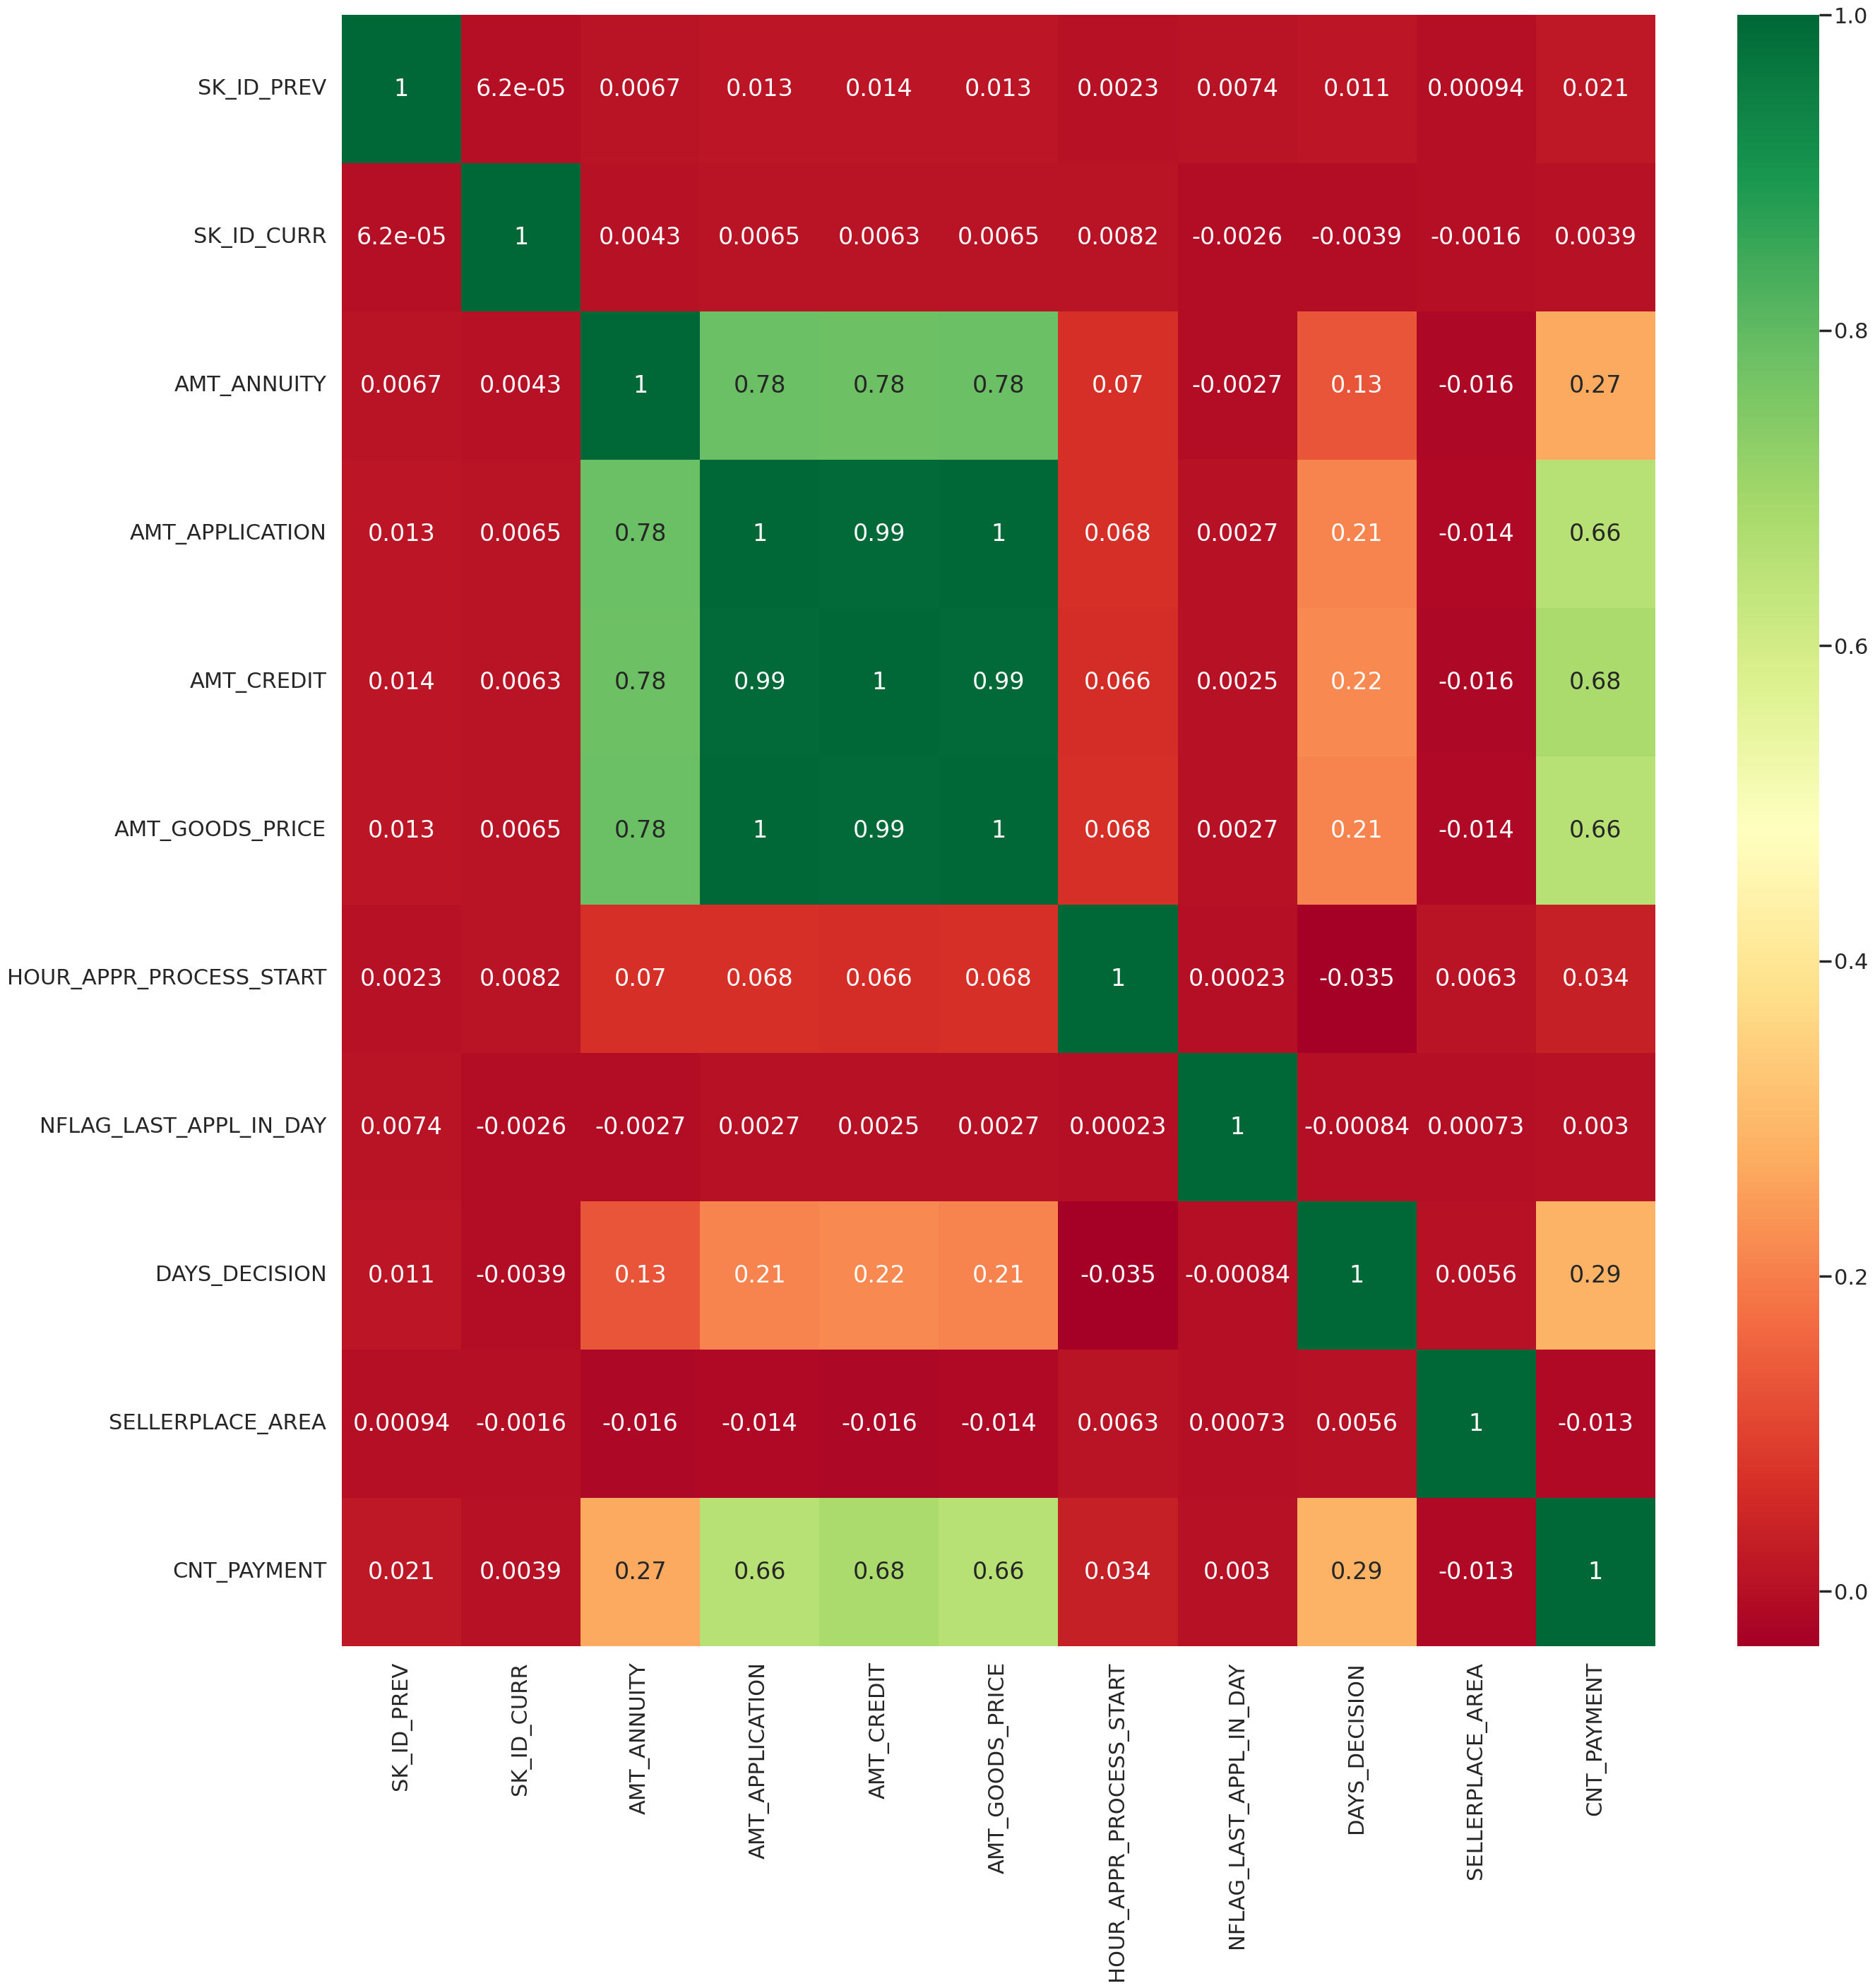

In [237]:
plt.figure(figsize=(30,30))
plt.show(sns.heatmap(df1.corr(), cmap='RdYlGn', annot=True))

**Displaying** the heatmap of our merged dataframe

In [238]:
plt.figure(figsize=(120,120))
plt.show(sns.heatmap(df2.corr(), cmap='RdYlGn', annot=True))

Model Creation

In [239]:
corr_matrix = df2.corr()
print(corr_matrix["TARGET"].sort_values(ascending=False))

TARGET                          1.000000
DAYS_DECISION                   0.062798
REG_CITY_NOT_WORK_CITY          0.055660
LIVE_CITY_NOT_WORK_CITY         0.041623
REG_CITY_NOT_LIVE_CITY          0.039054
CNT_PAYMENT                     0.030572
CNT_CHILDREN                    0.026986
OBS_30_CNT_SOCIAL_CIRCLE        0.026563
OBS_60_CNT_SOCIAL_CIRCLE        0.026209
CNT_FAM_MEMBERS                 0.025199
DEF_30_CNT_SOCIAL_CIRCLE        0.024675
DEF_60_CNT_SOCIAL_CIRCLE        0.021117
SELLERPLACE_AREA                0.020981
LIVE_REGION_NOT_WORK_REGION     0.006229
REG_REGION_NOT_WORK_REGION      0.005917
AMT_REQ_CREDIT_BUREAU_QRT       0.005153
AMT_REQ_CREDIT_BUREAU_DAY       0.004066
AMT_REQ_CREDIT_BUREAU_HOUR      0.000175
NFLAG_LAST_APPL_IN_DAY         -0.000161
AMT_ANNUITY                    -0.003872
AMT_REQ_CREDIT_BUREAU_WEEK     -0.003909
SK_ID_PREV                     -0.004207
REG_REGION_NOT_LIVE_REGION     -0.004221
SK_ID_CURR                     -0.004885
AMT_REQ_CREDIT_B

Problem Statement 1: Loan Preferences: Segment customers based on their loan preferences, considering factors like loan amount, term, type, and interest rates.
Repayment History: Further segment these groups based on their repayment history, such as timely payments, late payments, or defaults.


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = ['AMT_CREDIT', 'AMT_ANNUITY', 'CNT_PAYMENT', 'DAYS_DECISION', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
X = df2[features]
y = df2['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10358
           1       0.94      0.45      0.61      1525

    accuracy                           0.93     11883
   macro avg       0.93      0.72      0.78     11883
weighted avg       0.93      0.93      0.91     11883



In [241]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Test ROC-AUC score: {roc_auc}')

Accuracy: 0.9260287806109568
Test ROC-AUC score: 0.7238259490565621


*Problem* Statement 2: Risk Assessment: Evaluate and quantify the risk associated with each loan applicant using the model.
Approval Strategy Development: Develop strategies to balance risk minimization with approving a high number of safe loans.


In [242]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

features = ["DAYS_DECISION", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",
"CNT_PAYMENT", "CNT_CHILDREN", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "CNT_FAM_MEMBERS",
"DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "SELLERPLACE_AREA", "AMT_REQ_CREDIT_BUREAU_YEAR",
"AMT_CREDIT_PREV", "AMT_INCOME_TOTAL", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_CREDIT", "AMT_APPLICATION",
"AMT_GOODS_PRICEx", "HOUR_APPR_PROCESS_START_PREV", "HOUR_APPR_PROCESS_START", "AMT_GOODS_PRICE_",
"AMT_ANNUITY_PREV", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "REGION_POPULATION_RELATIVE",
"DAYS_BIRTH", "DAYS_LAST_PHONE_CHANGE", "EXT_SOURCE_2", "EXT_SOURCE_3"]

X = df2[features]
y = df2['TARGET']
model = RandomForestClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Test ROC-AUC score: {roc_auc}')
risk_threshold = 0.5
approved_loans = X_test[y_pred <= risk_threshold]

Test ROC-AUC score: 0.907988503382196


In [243]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE score: {rmse}')


Test RMSE score: 0.24539309951498908


In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE']
X = df2[features]
y = df2['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10358
           1       0.40      0.01      0.02      1525

    accuracy                           0.87     11883
   macro avg       0.63      0.50      0.48     11883
weighted avg       0.81      0.87      0.81     11883

